In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [10]:
import pandas as pd

# Attempt to read the CSV file with a specified encoding
try:
    # Replace '../artifacts/sentiment_analysis.csv' with the correct path to your file
    data = pd.read_csv('../artifacts/sentiment_analysis.csv', encoding='utf-8')
except UnicodeDecodeError:
    print("UTF-8 decoding failed. Trying with 'latin1' encoding...")
    data = pd.read_csv('../artifacts/sentiment_analysis.csv', encoding='latin1')

# Display the first few rows to ensure the data is loaded correctly
print(data.head())



UTF-8 decoding failed. Trying with 'latin1' encoding...
   id  label                                              tweet
0   1      0  #fingerprint #Pregnancy Test https://goo.gl/h1...
1   2      0  Finally a transparant silicon case ^^ Thanks t...
2   3      0  We love this! Would you go? #talk #makememorie...
3   4      0  I'm wired I know I'm George I was made that wa...
4   5      1  What amazing service! Apple won't even talk to...


In [19]:
data.shape

(7294, 3)

In [21]:
data.uplicated()

AttributeError: 'DataFrame' object has no attribute 'uplicated'

In [22]:
 # Check for duplicate rows in the DataFrame
duplicates = data.duplicated()

# Display duplicate rows
print(data[duplicates])


Empty DataFrame
Columns: [id, label, tweet]
Index: []


In [23]:
# Remove duplicate rows
data = data.drop_duplicates()

# Display the DataFrame without duplicates
print(data)


        id  label                                              tweet
0        1      0  #fingerprint #Pregnancy Test https://goo.gl/h1...
1        2      0  Finally a transparant silicon case ^^ Thanks t...
2        3      0  We love this! Would you go? #talk #makememorie...
3        4      0  I'm wired I know I'm George I was made that wa...
4        5      1  What amazing service! Apple won't even talk to...
...    ...    ...                                                ...
7289  8689      1        The white tea is poor, not worth the price.
7290  8690      1            The shop is too affordable and cramped.
7291  8691      1                        The oolong tea tastes poor.
7292  8692      1           I found the matcha tea to be unpleasant.
7293  8693      1                       Their quality is too unique.

[7294 rows x 3 columns]


In [24]:
# Count the number of duplicate rows
print(f"Number of duplicate rows: {data.duplicated().sum()}")


Number of duplicate rows: 0


### Data Preprocessing

In [25]:
data.shape

(7294, 3)

In [28]:
data.duplicated().sum()

np.int64(0)

In [29]:
data.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

### Text Preprocessing

In [33]:
import re
import string


Convert uppercase to lowercase


In [34]:
dataset["tweet"] = dataset["tweet"].apply(lambda x: " ".join(x.lower() for x in x.split()))


NameError: name 'dataset' is not defined

In [35]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(x.lower() for x in x.split()))


In [36]:
data

,id,label,tweet
0,1,0,#fingerprint #pregnancy test https://goo.gl/h1...
1,2,0,finally a transparant silicon case ^^ thanks t...
2,3,0,we love this! would you go? #talk #makememorie...
3,4,0,i'm wired i know i'm george i was made that wa...
4,5,1,what amazing service! apple won't even talk to...
...,...,...,...
7289,8689,1,"the white tea is poor, not worth the price."
7290,8690,1,the shop is too affordable and cramped.
7291,8691,1,the oolong tea tastes poor.
7292,8692,1,i found the matcha tea to be unpleasant.



Remove Links


In [37]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(re.sub(r'https?:\/\/.*[\r\n]*', '', x, flags=re.MULTILINE) for x in x.split()))


In [38]:
data["tweet"].head(5)

0    #fingerprint #pregnancy test  #android #apps #...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object


Remove Punctuations


In [49]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [39]:
import string  # Import string module for accessing string.punctuation

def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

# Apply the function to remove punctuations from the 'tweet' column
data["tweet"] = data["tweet"].apply(remove_punctuations)



data["tweet"].tail(20)


Remove Numbers


In [42]:
import pandas as pd


In [43]:
data["tweet"] = data["tweet"].str.replace(r'\d+', '', regex=True)


In [47]:
data["tweet"].head(10)

0    fingerprint pregnancy test  android apps beaut...
1    finally a transparant silicon case  thanks to ...
2    we love this would you go talk makememories un...
3    im wired i know im george i was made that way ...
4    what amazing service apple wont even talk to m...
5    iphone software update fucked up my phone big ...
6    happy for us  instapic instadaily us sony xper...
7    new type c charger cable uk  â¦ bay amazon et...
8    from deepellum towards downtown dallas bigd sa...
9    like and share if you want this d phone case f...
Name: tweet, dtype: object

In [50]:
!pip install nltk
# install nltk

In [51]:
import nltk

In [52]:
nltk.download('stopwords', download_dir='../static/model')
#download stop wards

[nltk_data] Downloading package stopwords to ../static/model...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [53]:
with open('../static/model/corpora/stopwords/english', 'r') as file:
    # Read the contents of the file and split it into a list of lines (each line contains a stopword)
    sw = file.read().splitlines()


In [54]:
sw

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [55]:
# Remove stopwords from the 'tweet' column in the dataset
# Iterate through each row in the 'tweet' column
data["tweet"] = data["tweet"].apply(
    lambda x: " ".join(
        x for x in x.split()  # Split the tweet into words and iterate through each word
        if x not in sw  # Keep only the words that are not in the stopwords list (sw)
    )
)


In [56]:
data["tweet"].tail()

7289     white tea poor worth price
7290        shop affordable cramped
7291         oolong tea tastes poor
7292    found matcha tea unpleasant
7293                 quality unique
Name: tweet, dtype: object


Stemming


In [57]:
# Import the PorterStemmer class from the nltk.stem module
from nltk.stem import PorterStemmer

# Create an instance of the PorterStemmer class
ps = PorterStemmer()


In [58]:
# Apply stemming to each word in the 'tweet' column using PorterStemmer
data["tweet"] = data["tweet"].apply(
    lambda x: " ".join(
        ps.stem(x)  # Stem each word in the tweet
        for x in x.split()  # Split the tweet into individual words
    )
)


In [60]:
data["tweet"].head()

0    fingerprint pregnanc test android app beauti c...
1    final transpar silicon case thank uncl yay son...
2    love would go talk makememori unplug relax iph...
3    im wire know im georg made way iphon cute dave...
4    amaz servic appl wont even talk question unles...
Name: tweet, dtype: object

In [61]:
data

,id,label,tweet
0,1,0,fingerprint pregnanc test android app beauti c...
1,2,0,final transpar silicon case thank uncl yay son...
2,3,0,love would go talk makememori unplug relax iph...
3,4,0,im wire know im georg made way iphon cute dave...
4,5,1,amaz servic appl wont even talk question unles...
...,...,...,...
7289,8689,1,white tea poor worth price
7290,8690,1,shop afford cramp
7291,8691,1,oolong tea tast poor
7292,8692,1,found matcha tea unpleas


### Building Vocabulary 

In [65]:
# Import the Counter class from the collections module
from collections import Counter

# Initialize a Counter object to count occurrences of words or tokens
volab = Counter()


In [74]:
print(vocab)  # Display the contents of the Counter


Counter()


In [75]:
data

,id,label,tweet
0,1,0,fingerprint pregnanc test android app beauti c...
1,2,0,final transpar silicon case thank uncl yay son...
2,3,0,love would go talk makememori unplug relax iph...
3,4,0,im wire know im georg made way iphon cute dave...
4,5,1,amaz servic appl wont even talk question unles...
...,...,...,...
7289,8689,1,white tea poor worth price
7290,8690,1,shop afford cramp
7291,8691,1,oolong tea tast poor
7292,8692,1,found matcha tea unpleas


In [76]:
for sentence in data['tweet']:
    print(sentence)


fingerprint pregnanc test android app beauti cute health iger iphoneonli iphonesia iphon
final transpar silicon case thank uncl yay soni xperia sonyexperiasâ¦
love would go talk makememori unplug relax iphon smartphon wifi connect
im wire know im georg made way iphon cute daventri home
amaz servic appl wont even talk question unless pay stupid support
iphon softwar updat fuck phone big time stupid iphon
happi us instap instadaili us soni xperia xperiaz
new type c charger cabl uk â¦ bay amazon etsi new year rob cross tobi young evemun mcmafia taylor spectr newyear start recip technolog samsunggalaxi iphonex pictwittercompjiwqwtc
deepellum toward downtown dalla bigd saturday rxm soni summer urban
like share want phone case iphon iphon â¦pictwittercomgfknyecj
go crazi iphonesia iphon instagood instagram photooftheday tweegram â¦
reason dont one iphon suck appl truth truthbetold agre fact realitycheck blackberrypictwittercomzpggdcazn
appl store gunna c screen monday ur fuck appl store 

In [77]:
for sentence in data['tweet']:
    vocab.update(sentence.split())


In [79]:
vocab


Counter({'iphon': 3383,
         'appl': 2334,
         'samsung': 1160,
         'new': 934,
         'phone': 838,
         'follow': 741,
         'soni': 677,
         'â\x80¦': 620,
         'like': 457,
         'ipad': 450,
         'rt': 435,
         'love': 422,
         'tea': 386,
         'day': 351,
         'app': 347,
         'android': 343,
         'life': 333,
         'photo': 331,
         'get': 315,
         'case': 303,
         'instagram': 302,
         'galaxi': 297,
         'io': 296,
         'beauti': 272,
         'cute': 271,
         'gain': 262,
         'work': 256,
         'today': 247,
         'im': 242,
         'fuck': 239,
         'photographi': 239,
         'got': 237,
         'happi': 236,
         'back': 235,
         'game': 232,
         'fun': 227,
         'amaz': 221,
         'music': 221,
         'news': 221,
         'thank': 211,
         'time': 202,
         'updat': 199,
         'make': 198,
         'girl': 187,
        

In [81]:
len (vocab)

14000

In [82]:
data.shape

(7294, 3)

In [83]:
tokens = [key for key in vocab if vocab[key] > 10]


In [84]:
tokens

['test',
 'android',
 'app',
 'beauti',
 'cute',
 'health',
 'iger',
 'iphoneonli',
 'iphonesia',
 'iphon',
 'final',
 'case',
 'thank',
 'yay',
 'soni',
 'xperia',
 'love',
 'would',
 'go',
 'talk',
 'relax',
 'smartphon',
 'wifi',
 'connect',
 'im',
 'know',
 'made',
 'way',
 'home',
 'amaz',
 'servic',
 'appl',
 'wont',
 'even',
 'question',
 'pay',
 'stupid',
 'support',
 'softwar',
 'updat',
 'fuck',
 'phone',
 'big',
 'time',
 'happi',
 'us',
 'instap',
 'instadaili',
 'xperiaz',
 'new',
 'type',
 'c',
 'charger',
 'cabl',
 'uk',
 'â\x80¦',
 'amazon',
 'year',
 'newyear',
 'start',
 'technolog',
 'samsunggalaxi',
 'iphonex',
 'saturday',
 'summer',
 'like',
 'share',
 'want',
 'crazi',
 'instagood',
 'instagram',
 'photooftheday',
 'tweegram',
 'reason',
 'dont',
 'one',
 'suck',
 'truth',
 'fact',
 'store',
 'screen',
 'monday',
 'ur',
 'art',
 'dear',
 'friend',
 'design',
 'face',
 'email',
 'seem',
 'pie',
 'wife',
 'ive',
 'ipod',
 'day',
 'button',
 'back',
 'broke',
 'hit'

In [85]:
len(tokens)

1023

In [86]:
def save_vocabulary(lines, filename):
    data = '\n'.join(lines)
    file = open(filename, 'w', encoding="utf-8")
    file.write(data)
    file.close()

save_vocabulary(tokens, '../static/model/vocabulary.txt')


### Divide Dataset

In [116]:
X = data['tweet']
y = data['label']

In [117]:
X

0       fingerprint pregnanc test android app beauti c...
1       final transpar silicon case thank uncl yay son...
2       love would go talk makememori unplug relax iph...
3       im wire know im georg made way iphon cute dave...
4       amaz servic appl wont even talk question unles...
                              ...                        
7289                           white tea poor worth price
7290                                    shop afford cramp
7291                                 oolong tea tast poor
7292                             found matcha tea unpleas
7293                                        qualiti uniqu
Name: tweet, Length: 7294, dtype: object

In [89]:
y

0       0
1       0
2       0
3       0
4       1
       ..
7289    1
7290    1
7291    1
7292    1
7293    1
Name: label, Length: 7294, dtype: int64

In [112]:
!pip install scikit-learn


In [124]:
# Import the train_test_split function from the sklearn.model_selection module
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
# X: Features (independent variables)
# y: Labels (dependent variable)
# test_size=0.2: Specifies that 20% of the data will be used for testing, and 80% for training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# X_train: Features for the training set (80% of the data)
# X_test: Features for the testing set (20% of the data)
# y_train: Labels for the training set
# y_test: Labels for the testing set



In [130]:
X_train

5318    askquest drandrew answer live download shoppin...
5382    gain follow rt must follow follow back follow ...
1078    dear appl thank get rid lowpro magsaf pop dest...
3552    realli lovin new phone android rock speed much...
4810    phone samsung blackberri instagram dailyphoto ...
                              ...                        
6841                               found oolong tea fresh
1105    hot girl china foodporn dj fli ballet ff famil...
5438    lowfat yogurt appl peach yogurt parfait sfree ...
4434     one told updat phone lose pictur worstdayev appl
1772          love wait appl hour get phone fix hateiphon
Name: tweet, Length: 5835, dtype: object

In [131]:
X_test

4315    michael l android anyon appl iphon microsoft a...
861     rt digisocieti pundit among iphon user love at...
5292              wish never updat facebook app fuck ugli
6496    piss macbook crash appl compani noth appl macb...
4247    gain follow rt must follow follow back follow ...
                              ...                        
767     ye smile capturedbymyey smile photographi sams...
909     hate iphon itâ slow buggi canât wait get s...
294     peopl thank hold door oh wait ur appl employe ...
6258    hate appl passion alway comput mess gonna mac ...
3150    oppo suck alway phone suffer heat problem best...
Name: tweet, Length: 1459, dtype: object

In [125]:
X_train.shape

(5835,)

In [126]:
X_test.shape

(1459,)

### Vectorization

In [127]:
# Define a function to vectorize sentences based on a given vocabulary
def vectorizer(ds, vocabulary):
    # Initialize an empty list to store the vectorized sentences
    vectorized_lst = []
    
    # Iterate over each sentence in the dataset
    for sentence in ds:
        # Create a zero vector of length equal to the vocabulary size
        sentence_lst = np.zeros(len(vocabulary))
        
        # Iterate through each word in the vocabulary
        for i in range(len(vocabulary)):
            # Check if the vocabulary word exists in the current sentence
            if vocabulary[i] in sentence.split():
                # Set the corresponding index in the sentence vector to 1
                sentence_lst[i] = 1
        
        # Append the vectorized sentence to the list
        vectorized_lst.append(sentence_lst)
    
    # Convert the list of vectors into a NumPy array with type float32
    vectorized_lst_new = np.asarray(vectorized_lst, dtype=np.float32)
    
    # Return the vectorized dataset
    return vectorized_lst_new


In [128]:
# Vectorize the training dataset using the vectorizer function
# X_train: The training dataset containing sentences or text data
# tokens: The vocabulary list used for vectorization
# vectorizer: A function that converts sentences into binary vectors based on the presence of tokens
vectorized_x_train = vectorizer(X_train, tokens)

# vectorized_x_train now contains the vectorized representation of the training data
# Each sentence in X_train is converted into a binary vector based on the tokens vocabulary


In [129]:
vectorized_x_train


array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [132]:
# Vectorize the testing dataset using the vectorizer function
# X_test: The testing dataset containing sentences or text data
# tokens: The vocabulary list used for vectorization
# vectorizer: A function that converts sentences into binary vectors based on the presence of tokens
vectorized_x_test = vectorizer(X_test, tokens)

# vectorized_x_test now contains the vectorized representation of the testing data
# Each sentence in X_test is converted into a binary vector based on the tokens vocabulary


In [133]:
vectorized_x_train

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [135]:
y_train

5318    0
5382    0
1078    1
3552    0
4810    0
       ..
6841    1
1105    0
5438    0
4434    1
1772    1
Name: label, Length: 5835, dtype: int64

In [136]:
y_train.value_counts()

label
0    3889
1    1946
Name: count, dtype: int64

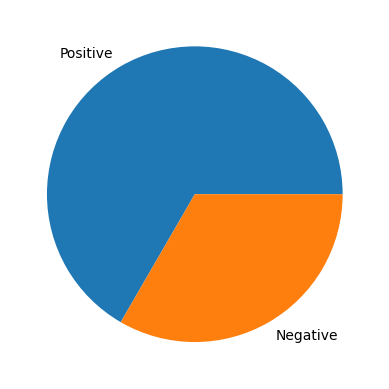

In [137]:
# Plot a pie chart to visualize the distribution of the target labels in the training set
# y_train: The labels for the training data (typically containing classes like 0 and 1)

# Create a pie chart using the counts of the target labels
plt.pie(
    # Convert the counts of each class in y_train to a NumPy array
    np.array([
        y_train.value_counts()[0],  # Count of the first class (e.g., Negative)
        y_train.value_counts()[1]   # Count of the second class (e.g., Positive)
    ]),
    labels=['Positive', 'Negative']  # Labels for the pie chart corresponding to the classes
)

# Display the pie chart
plt.show()


### Handle imbalanced dataset

In [140]:
# Import the SMOTE class from the imbalanced-learn library for oversampling
from imblearn.over_sampling import SMOTE

# Initialize the SMOTE object
# SMOTE (Synthetic Minority Oversampling Technique) is used to balance the dataset
smote = SMOTE()

# Apply SMOTE to the training dataset to handle class imbalance
# fit_resample() generates synthetic samples for the minority class
# vectorized_x_train: Features of the training data
# y_train: Labels of the training data
vectorized_x_train_smote, y_train_smote = smote.fit_resample(vectorized_x_train, y_train)

# Print the shape of the resampled training data to verify the changes
# vectorized_x_train_smote: New feature set after oversampling
# y_train_smote: New label set after oversampling
print(vectorized_x_train_smote.shape, y_train_smote.shape)


(7778, 1023) (7778,)


In [141]:
# Display the counts of each class in the resampled training labels
# y_train_smote: The labels of the training data after applying SMOTE
# value_counts(): Counts the number of occurrences of each unique value in the labels
y_train_smote.value_counts()


label
0    3889
1    3889
Name: count, dtype: int64

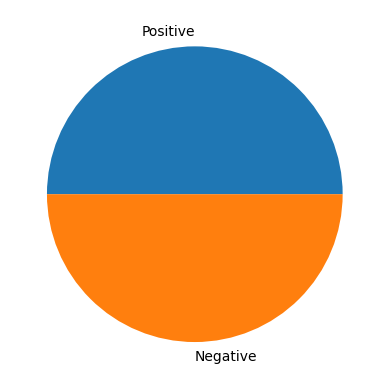

In [143]:
 plt.pie(np.array([y_train_smote.value_counts()[0], y_train_smote.value_counts()[1]]), labels=['Positive', 'Negative']) 
plt.show()


In [144]:
vectorized_x_train_smote

array([[0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.41847894, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

In [145]:
y_train_smote

0       0
1       0
2       1
3       0
4       0
       ..
7773    1
7774    1
7775    1
7776    1
7777    1
Name: label, Length: 7778, dtype: int64

In [146]:
vectorized_x_test

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [147]:
y_test

4315    0
861     0
5292    1
6496    1
4247    0
       ..
767     0
909     1
294     1
6258    0
3150    1
Name: label, Length: 1459, dtype: int64

### Model Training and Evaluation

In [149]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


In [150]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Function to calculate and display training scores
def training_scores(y_act, y_pred):
    # Calculate accuracy, precision, recall, and F1 score, rounding to 3 decimal places
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)

    # Print the training scores
    print(f'Training Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')

# Function to calculate and display validation/testing scores
def validation_scores(y_act, y_pred):
    # Calculate accuracy, precision, recall, and F1 score, rounding to 3 decimal places
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)

    # Print the validation/testing scores
    print(f'Testing Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')


### Logistic Regression

In [164]:
# Create an instance of the Logistic Regression model
lr = LogisticRegression()

# Train the Logistic Regression model on the balanced training data
# vectorized_x_train_smote: The feature matrix after applying SMOTE (oversampled)
# y_train_smote: The target labels after applying SMOTE (oversampled)
lr.fit(vectorized_x_train_smote, y_train_smote)

# Make predictions on the oversampled training data
# y_train_pred: Predicted labels for the training dataset
y_train_pred = lr.predict(vectorized_x_train_smote)

# Make predictions on the test data
# vectorized_x_test: Feature matrix for the test dataset
# y_test_pred: Predicted labels for the test dataset
y_test_pred = lr.predict(vectorized_x_test)

# Evaluate the model's performance on the training data
# training_scores: A function to calculate and display accuracy, precision, recall, and F1-score for training data
training_scores(y_train_smote, y_train_pred)

# Evaluate the model's performance on the test data
# validation_scores: A function to calculate and display accuracy, precision, recall, and F1-score for test data
validation_scores(y_test, y_test_pred)


Training Scores:
	Accuracy = 0.899
	Precision = 0.897
	Recall = 0.902
	F1-Score = 0.9
Testing Scores:
	Accuracy = 0.832
	Precision = 0.731
	Recall = 0.766
	F1-Score = 0.748


 ### Naive Bays

In [160]:
# Initialize the Logistic Regression model
lr = LogisticRegression()

# Train the Logistic Regression model on the oversampled training data
# vectorized_x_train_smote: Feature matrix after applying SMOTE (oversampled training data)
# y_train_smote: Target labels after applying SMOTE (oversampled training labels)
lr.fit(vectorized_x_train_smote, y_train_smote)

# Make predictions on the oversampled training data
# y_train_pred: Predicted labels for the training dataset
y_train_pred = lr.predict(vectorized_x_train_smote)

# Make predictions on the test data
# vectorized_x_test: Feature matrix for the test dataset
# y_test_pred: Predicted labels for the test dataset
y_test_pred = lr.predict(vectorized_x_test)

# Evaluate the model's performance on the training data
# training_scores: A function to calculate and display accuracy, precision, recall, and F1-score for training data
training_scores(y_train_smote, y_train_pred)

# Evaluate the model's performance on the test data
# validation_scores: A function to calculate and display accuracy, precision, recall, and F1-score for test data
validation_scores(y_test, y_test_pred)


Training Scores:
	Accuracy = 0.899
	Precision = 0.897
	Recall = 0.902
	F1-Score = 0.9
Testing Scores:
	Accuracy = 0.832
	Precision = 0.731
	Recall = 0.766
	F1-Score = 0.748


In [165]:
# Initialize the Multinomial Naive Bayes model
# MultinomialNB: A Naive Bayes classifier particularly suited for text classification tasks with discrete features
mnb = MultinomialNB()

# Train the Multinomial Naive Bayes model on the oversampled training data
# vectorized_x_train_smote: Feature matrix after applying SMOTE (oversampled training data)
# y_train_smote: Target labels after applying SMOTE (oversampled training labels)
mnb.fit(vectorized_x_train_smote, y_train_smote)

# Make predictions on the training data
# y_train_pred: Predicted labels for the training dataset
y_train_pred = mnb.predict(vectorized_x_train_smote)

# Make predictions on the test data
# vectorized_x_test: Feature matrix for the test dataset
# y_test_pred: Predicted labels for the test dataset
y_test_pred = mnb.predict(vectorized_x_test)

# Evaluate the model's performance on the training data
# training_scores: A custom function to calculate and display metrics such as accuracy, precision, recall, and F1-score for training data
training_scores(y_train_smote, y_train_pred)

# Evaluate the model's performance on the test data
# validation_scores: A custom function to calculate and display metrics such as accuracy, precision, recall, and F1-score for test data
validation_scores(y_test, y_test_pred)


Training Scores:
	Accuracy = 0.873
	Precision = 0.865
	Recall = 0.884
	F1-Score = 0.874
Testing Scores:
	Accuracy = 0.848
	Precision = 0.739
	Recall = 0.823
	F1-Score = 0.779


### Decision tree

In [166]:
# Initialize the Decision Tree Classifier
# DecisionTreeClassifier: A model that splits data based on features to make predictions
dt = DecisionTreeClassifier()

# Train the Decision Tree Classifier on the oversampled training data
# vectorized_x_train_smote: The training data (features) after applying SMOTE (oversampled)
# y_train_smote: The training labels after applying SMOTE (oversampled)
dt.fit(vectorized_x_train_smote, y_train_smote)

# Make predictions on the oversampled training data
# y_train_pred: The predicted labels for the training dataset
y_train_pred = dt.predict(vectorized_x_train_smote)

# Make predictions on the test data
# vectorized_x_test: The test data (features)
# y_test_pred: The predicted labels for the test dataset
y_test_pred = dt.predict(vectorized_x_test)

# Evaluate the performance of the model on the training data
# training_scores: A function to calculate and display accuracy, precision, recall, and F1-score for training data
training_scores(y_train_smote, y_train_pred)

# Evaluate the performance of the model on the test data
# validation_scores: A function to calculate and display accuracy, precision, recall, and F1-score for test data
validation_scores(y_test, y_test_pred)


Training Scores:
	Accuracy = 0.996
	Precision = 1.0
	Recall = 0.992
	F1-Score = 0.996
Testing Scores:
	Accuracy = 0.776
	Precision = 0.65
	Recall = 0.676
	F1-Score = 0.663


### Random Forest

In [167]:
# Import the RandomForestClassifier from sklearn
rf = RandomForestClassifier()

# Train the Random Forest model on the training data (balanced using SMOTE)
rf.fit(vectorized_x_train_smote, y_train_smote)

# Make predictions on the training set (to evaluate training performance)
y_train_pred = rf.predict(vectorized_x_train_smote)

# Make predictions on the test set (to evaluate validation performance)
y_test_pred = rf.predict(vectorized_x_test)

# Calculate and print scores for the training set
training_scores(y_train_smote, y_train_pred)

# Calculate and print scores for the test/validation set
validation_scores(y_test, y_test_pred)


Training Scores:
	Accuracy = 0.996
	Precision = 0.999
	Recall = 0.993
	F1-Score = 0.996
Testing Scores:
	Accuracy = 0.844
	Precision = 0.795
	Recall = 0.701
	F1-Score = 0.745


### Support Vector Machine 

In [168]:
# Import the SVM classifier
svm = SVC()

# Train the Support Vector Classifier on the training data (balanced using SMOTE)
svm.fit(vectorized_x_train_smote, y_train_smote)

# Make predictions on the training set (to evaluate training performance)
y_train_pred = svm.predict(vectorized_x_train_smote)

# Make predictions on the test set (to evaluate validation performance)
y_test_pred = svm.predict(vectorized_x_test)

# Calculate and print scores for the training set
training_scores(y_train_smote, y_train_pred)

# Calculate and print scores for the test/validation set
validation_scores(y_test, y_test_pred)


Training Scores:
	Accuracy = 0.957
	Precision = 0.96
	Recall = 0.954
	F1-Score = 0.957
Testing Scores:
	Accuracy = 0.849
	Precision = 0.785
	Recall = 0.739
	F1-Score = 0.761


Save Selected model for pickle format

In [169]:
import pickle

# Save the trained model to a file using pickle
with open('../static/model/model.pickle', 'wb') as file:
    pickle.dump(lr, file)
